In [ ]:
"""
COMPREHENSIVE PREDICTIVE MAINTENANCE SYSTEM - MERGED VERSION
Factory Brain - Graduation Project
AI4I 2020 Predictive Maintenance Dataset

This script includes:
1. Data Loading & Initial Exploration (from Module)
2. Comprehensive EDA (from Module - enhanced)
3. Advanced Feature Engineering (from Complete)
4. Model Training (6 models for 6 failure types)
5. Comprehensive Evaluation
6. Visualizations
7. Model Saving
"""


'\nCOMPREHENSIVE PREDICTIVE MAINTENANCE SYSTEM - MERGED VERSION\nFactory Brain - Graduation Project\nAI4I 2020 Predictive Maintenance Dataset\n\nThis script includes:\n1. Data Loading & Initial Exploration (from Module)\n2. Comprehensive EDA (from Module - enhanced)\n3. Advanced Feature Engineering (from Complete)\n4. Model Training (6 models for 6 failure types)\n5. Comprehensive Evaluation\n6. Visualizations\n7. Model Saving\n'

In [ ]:
# ================================
# PART 1: IMPORTS
# ================================
print("="*70)
print("PREDICTIVE MAINTENANCE - COMPLETE PIPELINE")
print("Factory Brain Graduation Project")
print("="*70)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Sklearn
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, precision_recall_curve,
    roc_curve, average_precision_score
)

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# Imbalance handling
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Advanced models (optional)
try:
    import xgboost as xgb
    XGBOOST_AVAILABLE = True
    print("✅ XGBoost available")
except:
    XGBOOST_AVAILABLE = False
    print("⚠️ XGBoost not available (optional)")

try:
    import lightgbm as lgb
    LIGHTGBM_AVAILABLE = True
    print("✅ LightGBM available")
except:
    LIGHTGBM_AVAILABLE = False
    print("⚠️ LightGBM not available (optional)")

import joblib
import json
from datetime import datetime

print("\n✅ All libraries imported successfully!")


PREDICTIVE MAINTENANCE - COMPLETE PIPELINE
Factory Brain Graduation Project
✅ XGBoost available
✅ LightGBM available

✅ All libraries imported successfully!


In [ ]:
# ================================
# PART 2: DATA LOADING & INITIAL EXPLORATION
# ================================
print("\n" + "="*70)
print("PART 2: DATA LOADING & INITIAL EXPLORATION")
print("="*70)

# Load the dataset
df = pd.read_csv("ai4i2020.csv")

print(f"\n✅ Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

# Display first few rows
print("\nFirst 5 rows:")
print(df.head())



PART 2: DATA LOADING & INITIAL EXPLORATION

✅ Dataset loaded successfully!
Shape: (10000, 14)
Columns: ['UDI', 'Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']

First 5 rows:
   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2          

In [ ]:
# Basic info
print("\nData Types:")
print(df.dtypes)

print("\n" + "="*50)

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

print("\n" + "="*50)

# Check for duplicates
print(f"\nDuplicate Rows: {df.duplicated().sum()}")



Data Types:
UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object


Missing Values:
UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


Duplicate Rows: 0


In [ ]:
# Define columns
id_cols = ['UDI', 'Product ID']
categorical_features = ['Type']
numerical_features = ['Air temperature [K]', 'Process temperature [K]',
                      'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
target_cols = ['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']

print("\nColumn Groups:")
print("-" * 40)
print(f"ID Columns (to remove): {id_cols}")
print(f"Categorical Features: {categorical_features}")
print(f"Numerical Features: {numerical_features}")
print(f"Target Columns (6 models): {target_cols}")



Column Groups:
----------------------------------------
ID Columns (to remove): ['UDI', 'Product ID']
Categorical Features: ['Type']
Numerical Features: ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
Target Columns (6 models): ['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']


In [ ]:
# Remove ID columns
df_clean = df.drop(columns=['UDI', 'Product ID'])

print(f"\nData Cleaning Results:")
print(f"Before cleaning: {df.shape}")
print(f"After cleaning: {df_clean.shape}")
print(f"\nRemaining columns: {df_clean.columns.tolist()}")

# Convert 'Type' to category
df_clean['Type'] = df_clean['Type'].astype('category')

print("\n✅ 'Type' column converted to categorical")

# Check data types after fixing
print("\nData Types After Fixing:")
print(df_clean.dtypes)



Data Cleaning Results:
Before cleaning: (10000, 14)
After cleaning: (10000, 12)

Remaining columns: ['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']

✅ 'Type' column converted to categorical

Data Types After Fixing:
Type                       category
Air temperature [K]         float64
Process temperature [K]     float64
Rotational speed [rpm]        int64
Torque [Nm]                 float64
Tool wear [min]               int64
Machine failure               int64
TWF                           int64
HDF                           int64
PWF                           int64
OSF                           int64
RNF                           int64
dtype: object


In [ ]:
# Check value ranges
print("\nFeature Value Ranges:")
print("-" * 40)

for col in numerical_features:
    print(f"{col}: {df_clean[col].min():.1f} to {df_clean[col].max():.1f}")

print("\n" + "-" * 40)
print("\nTarget Values (should be 0 and 1 only):")

for col in target_cols:
    print(f"{col}: {sorted(df_clean[col].unique())}")

# Save cleaned data
df_clean.to_csv('ai4i2020_cleaned.csv', index=False)
print("\n✅ Cleaned data saved to 'ai4i2020_cleaned.csv'")



Feature Value Ranges:
----------------------------------------
Air temperature [K]: 295.3 to 304.5
Process temperature [K]: 305.7 to 313.8
Rotational speed [rpm]: 1168.0 to 2886.0
Torque [Nm]: 3.8 to 76.6
Tool wear [min]: 0.0 to 253.0

----------------------------------------

Target Values (should be 0 and 1 only):
Machine failure: [np.int64(0), np.int64(1)]
TWF: [np.int64(0), np.int64(1)]
HDF: [np.int64(0), np.int64(1)]
PWF: [np.int64(0), np.int64(1)]
OSF: [np.int64(0), np.int64(1)]
RNF: [np.int64(0), np.int64(1)]

✅ Cleaned data saved to 'ai4i2020_cleaned.csv'


In [ ]:
# ================================
# PART 3: EXPLORATORY DATA ANALYSIS (EDA)
# ================================
print("\n" + "="*70)
print("PART 3: EXPLORATORY DATA ANALYSIS (EDA)")
print("="*70)

# Set style for visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")



PART 3: EXPLORATORY DATA ANALYSIS (EDA)


In [ ]:
# 3.1 Basic statistics for numerical features
print("\n3.1 BASIC STATISTICS:")
print("-" * 40)
print(df_clean[numerical_features].describe().round(2))



3.1 BASIC STATISTICS:
----------------------------------------
       Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
count              10000.0                 10000.00                10000.00   
mean                 300.0                   310.01                 1538.78   
std                    2.0                     1.48                  179.28   
min                  295.3                   305.70                 1168.00   
25%                  298.3                   308.80                 1423.00   
50%                  300.1                   310.10                 1503.00   
75%                  301.5                   311.10                 1612.00   
max                  304.5                   313.80                 2886.00   

       Torque [Nm]  Tool wear [min]  
count     10000.00         10000.00  
mean         39.99           107.95  
std           9.97            63.65  
min           3.80             0.00  
25%          33.20            53.0

In [ ]:
# 3.2 Product type distribution
print("\n3.2 PRODUCT TYPE DISTRIBUTION:")
print("-" * 40)
type_counts = df_clean['Type'].value_counts()
print("Counts:")
print(type_counts)
print("\nPercentages:")
print((type_counts / len(df_clean) * 100).round(1))



3.2 PRODUCT TYPE DISTRIBUTION:
----------------------------------------
Counts:
Type
L    6000
M    2997
H    1003
Name: count, dtype: int64

Percentages:
Type
L    60.0
M    30.0
H    10.0
Name: count, dtype: float64


In [ ]:
# 3.3 Target variable distribution
print("\n3.3 TARGET VARIABLE DISTRIBUTION:")
print("-" * 40)
print("="*60)

for i, target in enumerate(target_cols, 1):
    total = len(df_clean)
    failures = df_clean[target].sum()
    no_failures = total - failures

    print(f"\nModel {i}: {target}")
    print(f"  No Failure (0): {no_failures:,} ({no_failures/total*100:.2f}%)")
    print(f"  Failure (1):    {failures:,} ({failures/total*100:.2f}%)")

    if failures > 0:
        ratio = no_failures / failures
        print(f"  Imbalance Ratio: {ratio:.1f}:1")



3.3 TARGET VARIABLE DISTRIBUTION:
----------------------------------------

Model 1: Machine failure
  No Failure (0): 9,661 (96.61%)
  Failure (1):    339 (3.39%)
  Imbalance Ratio: 28.5:1

Model 2: TWF
  No Failure (0): 9,954 (99.54%)
  Failure (1):    46 (0.46%)
  Imbalance Ratio: 216.4:1

Model 3: HDF
  No Failure (0): 9,885 (98.85%)
  Failure (1):    115 (1.15%)
  Imbalance Ratio: 86.0:1

Model 4: PWF
  No Failure (0): 9,905 (99.05%)
  Failure (1):    95 (0.95%)
  Imbalance Ratio: 104.3:1

Model 5: OSF
  No Failure (0): 9,902 (99.02%)
  Failure (1):    98 (0.98%)
  Imbalance Ratio: 101.0:1

Model 6: RNF
  No Failure (0): 9,981 (99.81%)
  Failure (1):    19 (0.19%)
  Imbalance Ratio: 525.3:1


In [ ]:
# 3.4 Outlier detection (IQR method)
print("\n3.4 OUTLIER DETECTION (IQR Method):")
print("-" * 40)

for col in numerical_features:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df_clean[(df_clean[col] < lower) | (df_clean[col] > upper)]
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df_clean)*100:.2f}%)")



3.4 OUTLIER DETECTION (IQR Method):
----------------------------------------
Air temperature [K]: 0 outliers (0.00%)
Process temperature [K]: 0 outliers (0.00%)
Rotational speed [rpm]: 418 outliers (4.18%)
Torque [Nm]: 69 outliers (0.69%)
Tool wear [min]: 0 outliers (0.00%)


In [ ]:
# 3.5 Correlation analysis
print("\n3.5 CORRELATION ANALYSIS:")
print("-" * 40)

all_corr_cols = numerical_features + target_cols
corr = df_clean[all_corr_cols].corr()

print("\nFeature Correlations with Each Target:")
print("="*70)

for i, target in enumerate(target_cols, 1):
    print(f"\nModel {i}: {target}")
    print("-" * 40)

    for feature in numerical_features:
        corr_value = df_clean[feature].corr(df_clean[target])
        print(f"  {feature}: {corr_value:.4f}")



3.5 CORRELATION ANALYSIS:
----------------------------------------

Feature Correlations with Each Target:

Model 1: Machine failure
----------------------------------------
  Air temperature [K]: 0.0826
  Process temperature [K]: 0.0359
  Rotational speed [rpm]: -0.0442
  Torque [Nm]: 0.1913
  Tool wear [min]: 0.1054

Model 2: TWF
----------------------------------------
  Air temperature [K]: 0.0100
  Process temperature [K]: 0.0073
  Rotational speed [rpm]: 0.0104
  Torque [Nm]: -0.0147
  Tool wear [min]: 0.1158

Model 3: HDF
----------------------------------------
  Air temperature [K]: 0.1378
  Process temperature [K]: 0.0569
  Rotational speed [rpm]: -0.1212
  Torque [Nm]: 0.1426
  Tool wear [min]: -0.0013

Model 4: PWF
----------------------------------------
  Air temperature [K]: 0.0035
  Process temperature [K]: -0.0034
  Rotational speed [rpm]: 0.1230
  Torque [Nm]: 0.0838
  Tool wear [min]: -0.0093

Model 5: OSF
----------------------------------------
  Air temperature [

In [ ]:
# 3.6 Statistical significance tests
print("\n3.6 STATISTICAL SIGNIFICANCE TESTS:")
print("-" * 40)
print("Testing if features differ between failure/no-failure groups")
print("(Mann-Whitney U test, p < 0.05 = significant)")

no_fail = df_clean[df_clean['Machine failure'] == 0]
fail = df_clean[df_clean['Machine failure'] == 1]

for feature in numerical_features:
    stat, pvalue = stats.mannwhitneyu(no_fail[feature], fail[feature])
    sig = "✅ SIGNIFICANT" if pvalue < 0.05 else "❌ Not significant"
    print(f"{feature}: p={pvalue:.4e} - {sig}")



3.6 STATISTICAL SIGNIFICANCE TESTS:
----------------------------------------
Testing if features differ between failure/no-failure groups
(Mann-Whitney U test, p < 0.05 = significant)
Air temperature [K]: p=8.6561e-17 - ✅ SIGNIFICANT
Process temperature [K]: p=6.4861e-05 - ✅ SIGNIFICANT
Rotational speed [rpm]: p=9.7069e-63 - ✅ SIGNIFICANT
Torque [Nm]: p=2.2622e-64 - ✅ SIGNIFICANT
Tool wear [min]: p=2.9165e-24 - ✅ SIGNIFICANT


In [ ]:
# 3.7 Failure rate by product type
print("\n3.7 FAILURE RATE BY PRODUCT TYPE:")
print("-" * 40)

for target in target_cols:
    print(f"\n{target}:")

    for ptype in ['L', 'M', 'H']:
        subset = df_clean[df_clean['Type'] == ptype]
        rate = subset[target].mean() * 100
        print(f"  Type {ptype}: {rate:.2f}%")



3.7 FAILURE RATE BY PRODUCT TYPE:
----------------------------------------

Machine failure:
  Type L: 3.92%
  Type M: 2.77%
  Type H: 2.09%

TWF:
  Type L: 0.42%
  Type M: 0.47%
  Type H: 0.70%

HDF:
  Type L: 1.27%
  Type M: 1.03%
  Type H: 0.80%

PWF:
  Type L: 0.98%
  Type M: 1.03%
  Type H: 0.50%

OSF:
  Type L: 1.45%
  Type M: 0.30%
  Type H: 0.20%

RNF:
  Type L: 0.22%
  Type M: 0.07%
  Type H: 0.40%


In [ ]:
# ================================
# PART 4: CREATING COMPREHENSIVE VISUALIZATIONS
# ================================
print("\n" + "="*70)
print("PART 4: CREATING COMPREHENSIVE VISUALIZATIONS")
print("="*70)



PART 4: CREATING COMPREHENSIVE VISUALIZATIONS



4.1 Creating target distribution plots...


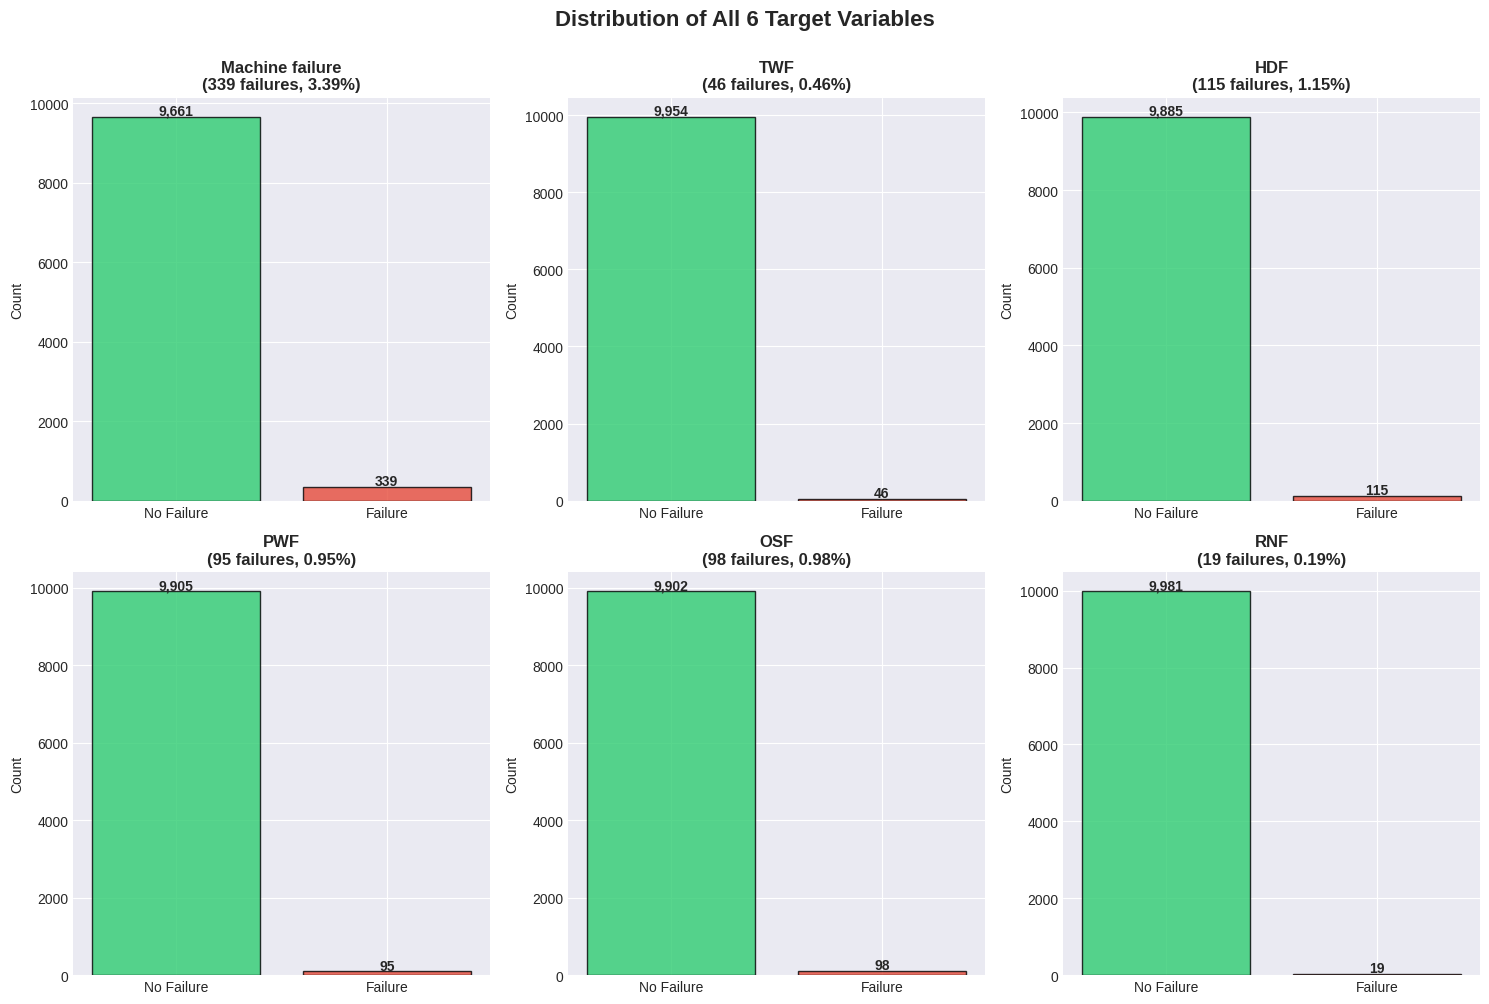

   ✅ Saved: 01_target_distribution.png


In [ ]:
# 4.1 Target distribution plots
print("\n4.1 Creating target distribution plots...")
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, target in enumerate(target_cols):
    counts = df_clean[target].value_counts().sort_index()
    axes[i].bar(['No Failure', 'Failure'], counts.values,
                color=['#2ecc71', '#e74c3c'], alpha=0.8, edgecolor='black')
    axes[i].set_title(f'{target}\n({counts[1]} failures, {counts[1]/len(df_clean)*100:.2f}%)',
                      fontsize=12, fontweight='bold')
    axes[i].set_ylabel('Count')

    # Add count labels
    for j, count in enumerate(counts.values):
        axes[i].text(j, count + 50, f'{count:,}', ha='center', fontweight='bold')

plt.suptitle('Distribution of All 6 Target Variables', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('01_target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("   ✅ Saved: 01_target_distribution.png")



4.2 Creating feature histograms...


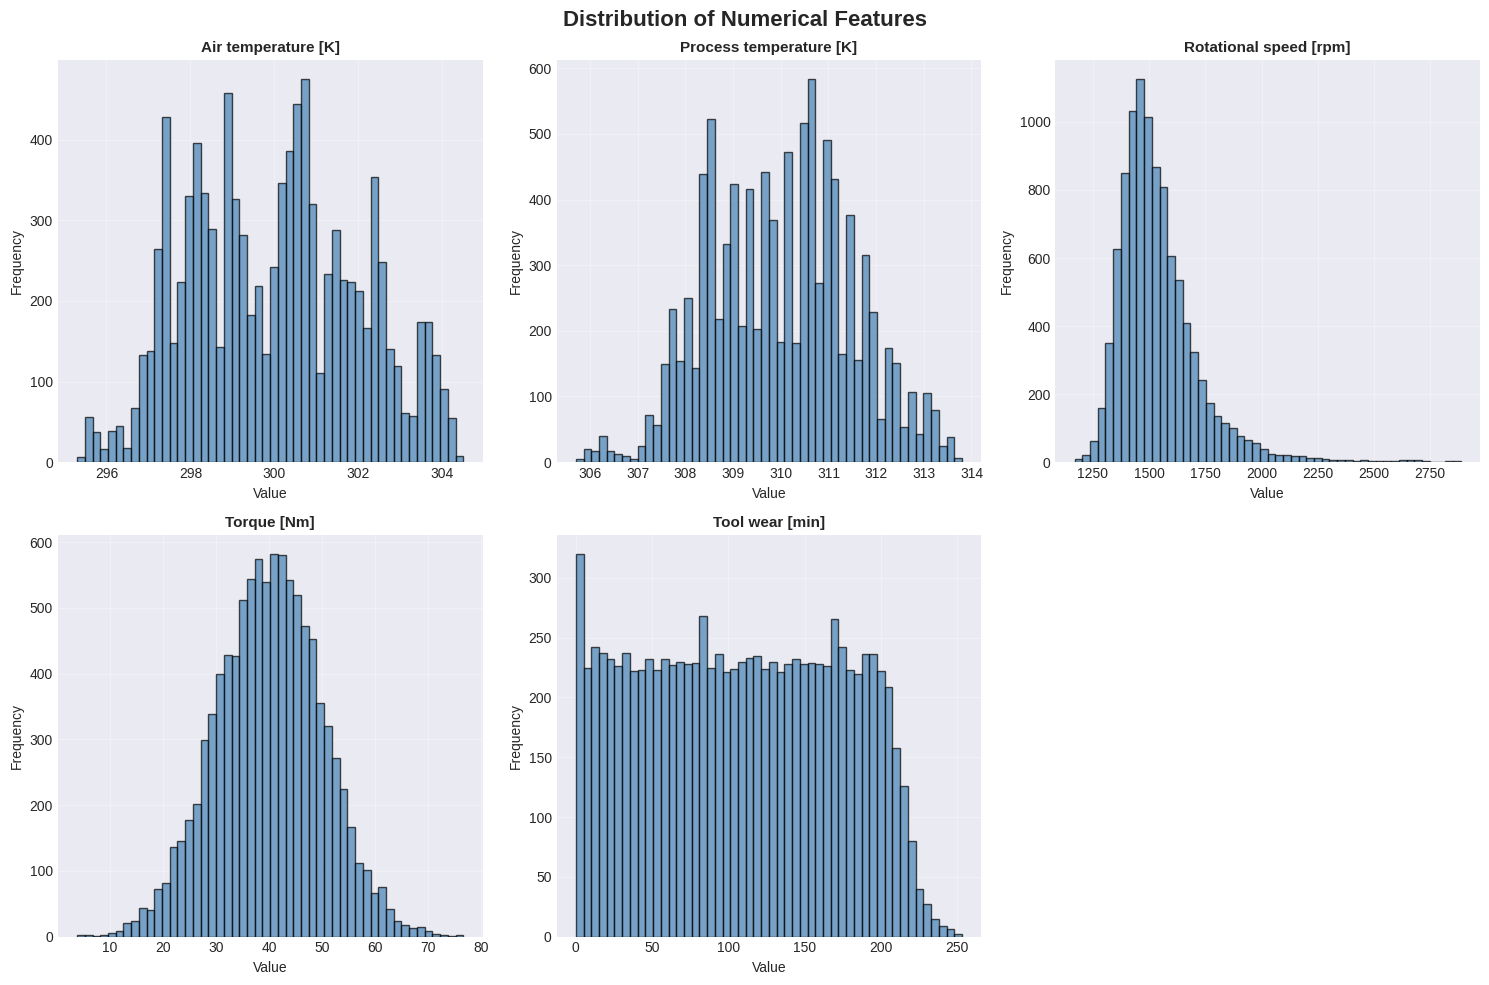

   ✅ Saved: 02_feature_histograms.png


In [ ]:
# 4.2 Feature histograms
print("\n4.2 Creating feature histograms...")
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    axes[i].hist(df_clean[col], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
    axes[i].set_title(col, fontsize=11, fontweight='bold')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(alpha=0.3)

axes[5].axis('off')

plt.suptitle('Distribution of Numerical Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('02_feature_histograms.png', dpi=300, bbox_inches='tight')
plt.show()
print("   ✅ Saved: 02_feature_histograms.png")



4.3 Creating box plots...


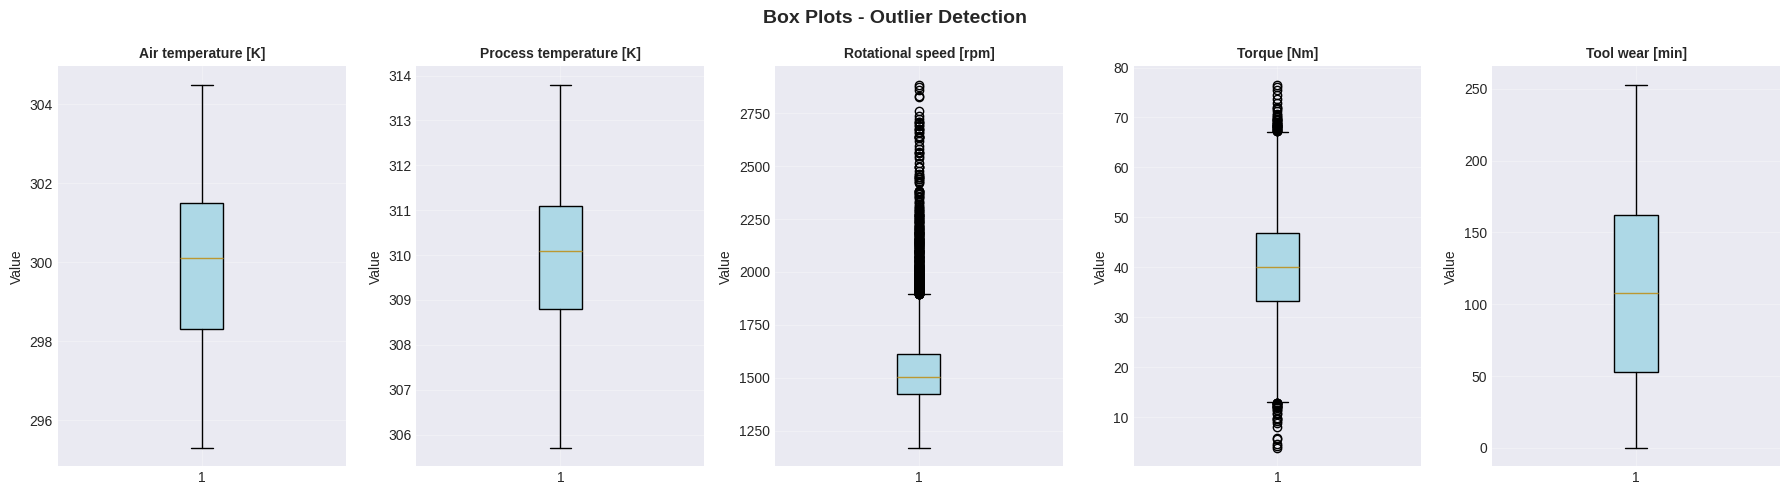

   ✅ Saved: 03_boxplots.png


In [ ]:
# 4.3 Box plots for outlier detection
print("\n4.3 Creating box plots...")
fig, axes = plt.subplots(1, 5, figsize=(18, 5))

for i, col in enumerate(numerical_features):
    bp = axes[i].boxplot(df_clean[col], patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')
    axes[i].set_title(col, fontsize=10, fontweight='bold')
    axes[i].set_ylabel('Value')
    axes[i].grid(alpha=0.3)

plt.suptitle('Box Plots - Outlier Detection', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('03_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()
print("   ✅ Saved: 03_boxplots.png")



4.4 Creating correlation heatmap...


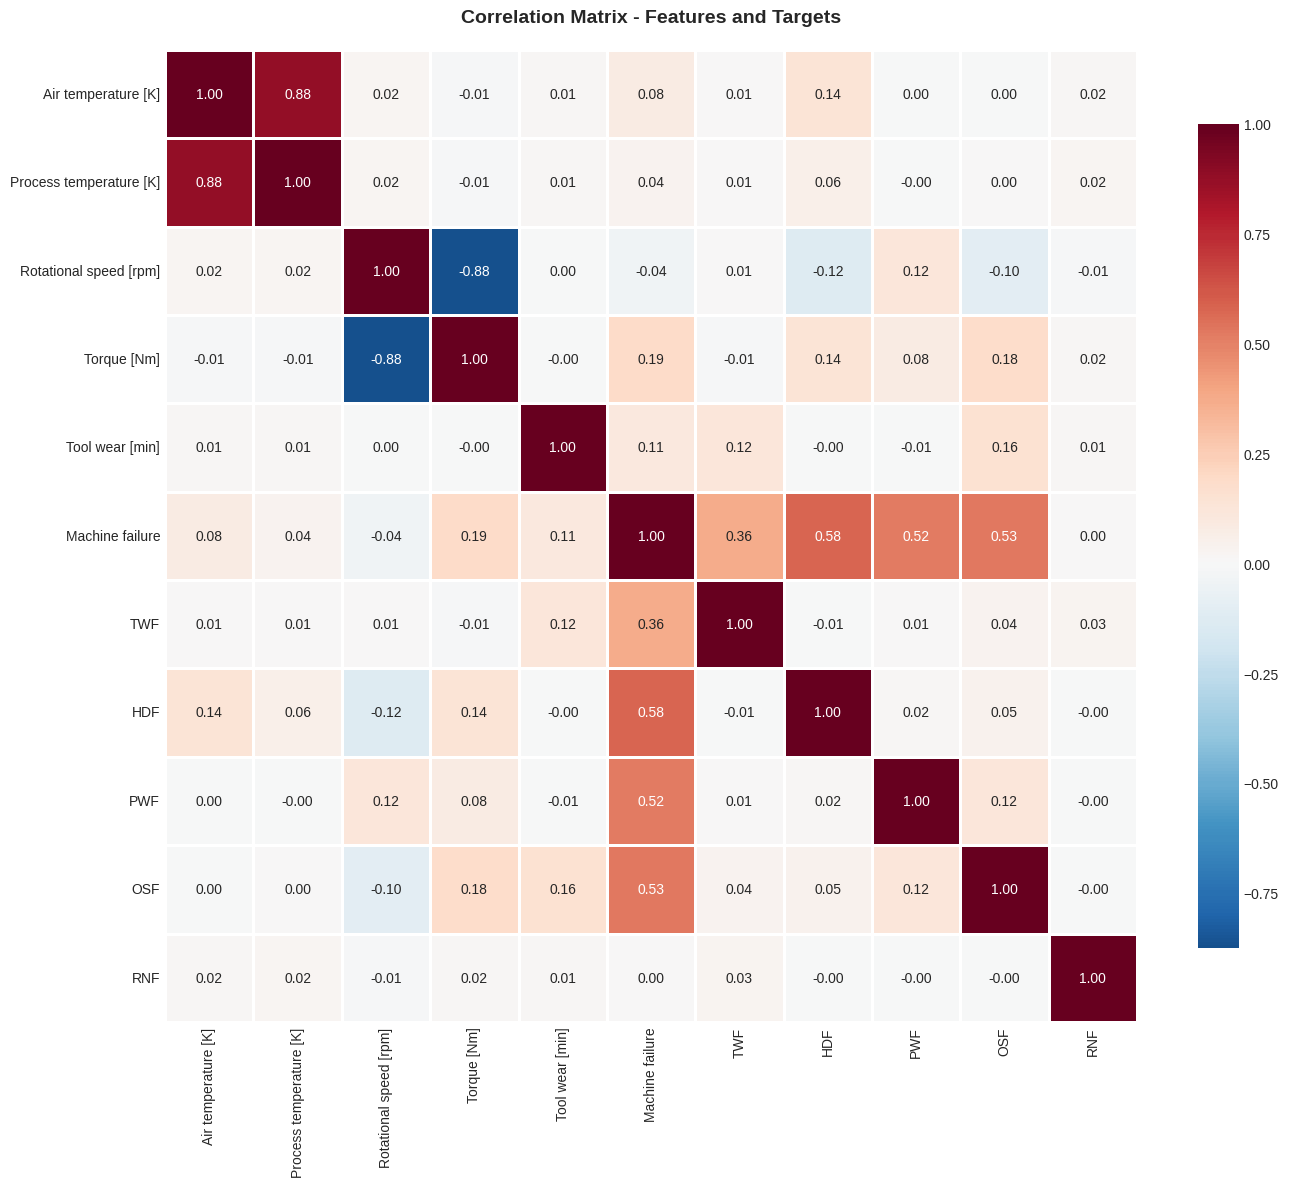

   ✅ Saved: 04_correlation_matrix.png


In [ ]:
# 4.4 Correlation heatmap
print("\n4.4 Creating correlation heatmap...")
plt.figure(figsize=(14, 12))
correlation_cols = numerical_features + target_cols
corr_matrix = df_clean[correlation_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Features and Targets', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('04_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()
print("   ✅ Saved: 04_correlation_matrix.png")



4.5 Creating feature comparison plots...


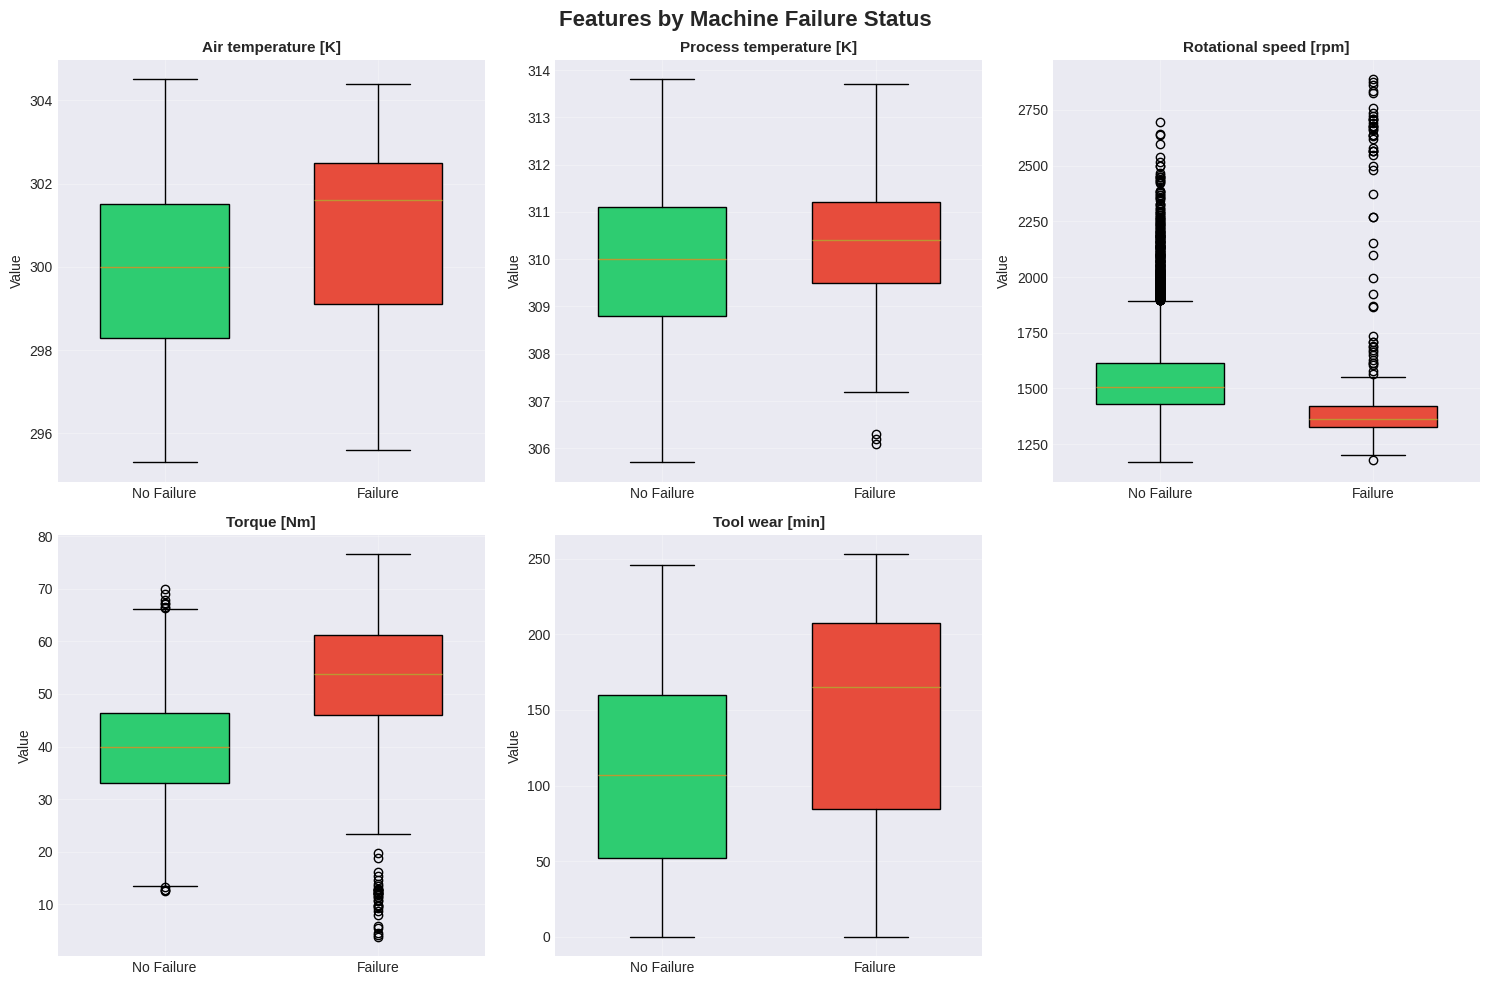

   ✅ Saved: 05_features_vs_failure.png


In [ ]:
# 4.5 Features by failure status
print("\n4.5 Creating feature comparison plots...")
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    no_fail_data = df_clean[df_clean['Machine failure'] == 0][feature]
    fail_data = df_clean[df_clean['Machine failure'] == 1][feature]

    bp = axes[i].boxplot([no_fail_data, fail_data],
                         labels=['No Failure', 'Failure'],
                         patch_artist=True,
                         widths=0.6)

    bp['boxes'][0].set_facecolor('#2ecc71')
    bp['boxes'][1].set_facecolor('#e74c3c')

    axes[i].set_title(feature, fontsize=11, fontweight='bold')
    axes[i].set_ylabel('Value')
    axes[i].grid(alpha=0.3)

axes[5].axis('off')

plt.suptitle('Features by Machine Failure Status', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('05_features_vs_failure.png', dpi=300, bbox_inches='tight')
plt.show()
print("   ✅ Saved: 05_features_vs_failure.png")



4.6 Creating failure rate comparison...


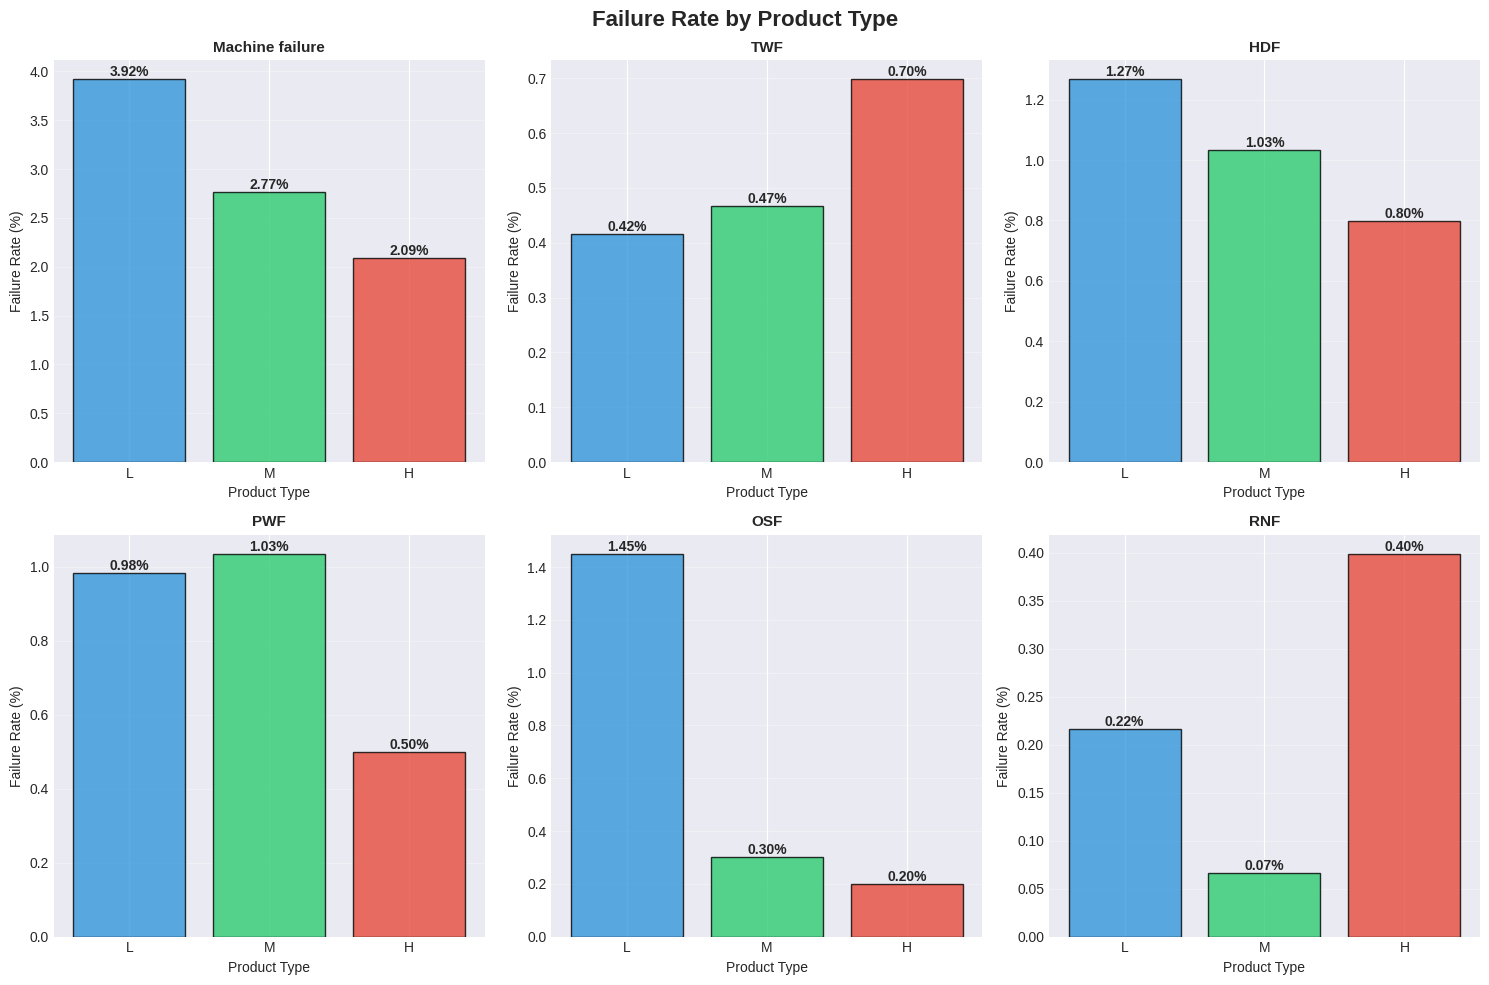

   ✅ Saved: 06_failure_rate_by_type.png


In [ ]:
# 4.6 Failure rates by product type
print("\n4.6 Creating failure rate comparison...")
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, target in enumerate(target_cols):
    rates = df_clean.groupby('Type')[target].mean() * 100
    bars = axes[i].bar(['L', 'M', 'H'], [rates['L'], rates['M'], rates['H']],
                       color=['#3498db', '#2ecc71', '#e74c3c'], alpha=0.8, edgecolor='black')
    axes[i].set_title(f'{target}', fontsize=11, fontweight='bold')
    axes[i].set_ylabel('Failure Rate (%)')
    axes[i].set_xlabel('Product Type')
    axes[i].grid(alpha=0.3, axis='y')

    # Add percentage labels
    for bar in bars:
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.2f}%', ha='center', va='bottom', fontweight='bold')

plt.suptitle('Failure Rate by Product Type', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('06_failure_rate_by_type.png', dpi=300, bbox_inches='tight')
plt.show()
print("   ✅ Saved: 06_failure_rate_by_type.png")



4.7 Creating scatter plots...


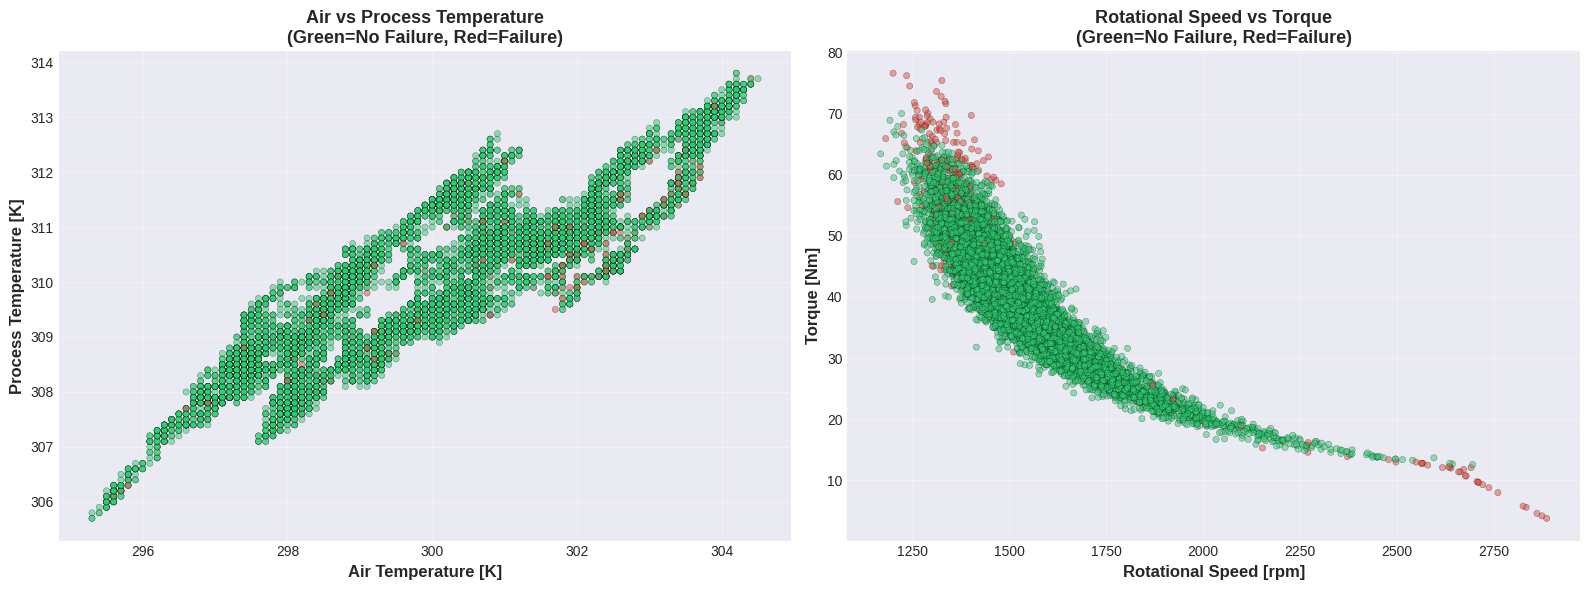

   ✅ Saved: 07_scatter_plots.png


In [ ]:
# 4.7 Scatter plots
print("\n4.7 Creating scatter plots...")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Temperature scatter
colors = df_clean['Machine failure'].map({0: '#2ecc71', 1: '#e74c3c'})
ax1.scatter(df_clean['Air temperature [K]'], df_clean['Process temperature [K]'],
           c=colors, alpha=0.5, s=20, edgecolors='black', linewidth=0.3)
ax1.set_xlabel('Air Temperature [K]', fontsize=12, fontweight='bold')
ax1.set_ylabel('Process Temperature [K]', fontsize=12, fontweight='bold')
ax1.set_title('Air vs Process Temperature\n(Green=No Failure, Red=Failure)',
             fontsize=13, fontweight='bold')
ax1.grid(alpha=0.3)

# Torque vs Speed scatter
ax2.scatter(df_clean['Rotational speed [rpm]'], df_clean['Torque [Nm]'],
           c=colors, alpha=0.5, s=20, edgecolors='black', linewidth=0.3)
ax2.set_xlabel('Rotational Speed [rpm]', fontsize=12, fontweight='bold')
ax2.set_ylabel('Torque [Nm]', fontsize=12, fontweight='bold')
ax2.set_title('Rotational Speed vs Torque\n(Green=No Failure, Red=Failure)',
             fontsize=13, fontweight='bold')
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('07_scatter_plots.png', dpi=300, bbox_inches='tight')
plt.show()
print("   ✅ Saved: 07_scatter_plots.png")



4.8 Creating failure type comparison...


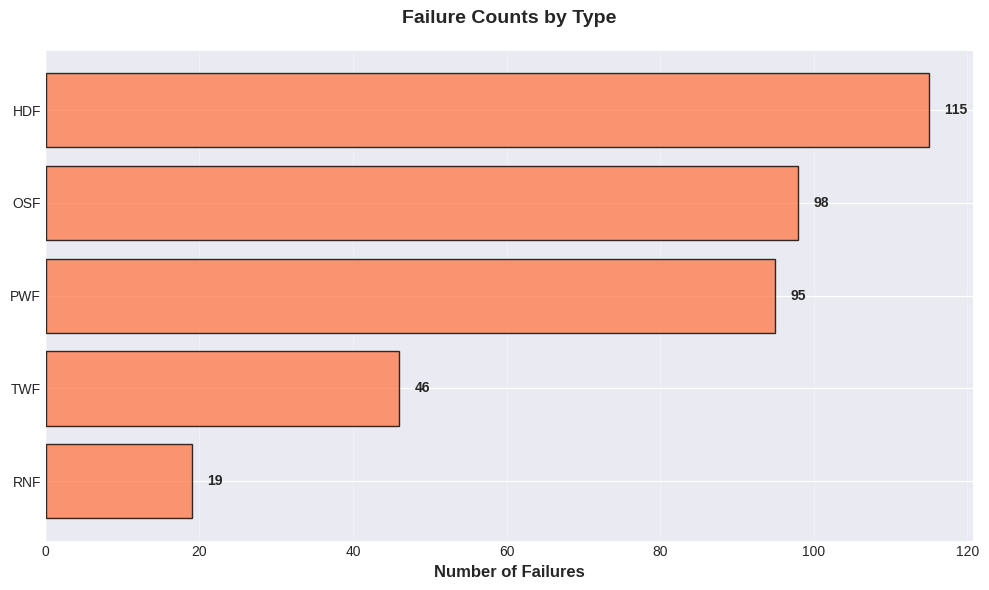

   ✅ Saved: 08_failure_type_counts.png

✅ All EDA visualizations created successfully!


In [ ]:
# 4.8 Failure type counts
print("\n4.8 Creating failure type comparison...")
failure_types = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
counts = df_clean[failure_types].sum().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
bars = plt.barh(counts.index, counts.values, color='coral', edgecolor='black', alpha=0.8)
plt.xlabel('Number of Failures', fontsize=12, fontweight='bold')
plt.title('Failure Counts by Type', fontsize=14, fontweight='bold', pad=20)
plt.grid(alpha=0.3, axis='x')

# Add count labels
for i, (bar, count) in enumerate(zip(bars, counts.values)):
    plt.text(count + 2, i, str(count), va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('08_failure_type_counts.png', dpi=300, bbox_inches='tight')
plt.show()
print("   ✅ Saved: 08_failure_type_counts.png")

print("\n✅ All EDA visualizations created successfully!")


In [ ]:
# ================================
# PART 5: EDA SUMMARY
# ================================
print("\n" + "="*70)
print("EDA SUMMARY FOR 6 MODELS")
print("="*70)

print("\n📊 DATASET:")
print(f"   Total samples: {len(df_clean):,}")
print(f"   Features: {len(numerical_features) + len(categorical_features)} (5 numerical + 1 categorical)")
print(f"   Targets: {len(target_cols)} (for 6 separate models)")

print("\n🎯 6 MODELS TO BUILD:")
print("-"*50)

for i, target in enumerate(target_cols, 1):
    count = df_clean[target].sum()
    ratio = (len(df_clean) - count) / count if count > 0 else 0

    print(f"\n   Model {i}: {target}")
    print(f"   - Failure cases: {count:,}")
    print(f"   - Imbalance ratio: {ratio:.0f}:1")

    if ratio > 50:
        print(f"   - Status: ⚠️ Highly imbalanced - use SMOTE")
    elif ratio > 20:
        print(f"   - Status: ⚠️ Imbalanced - use class weights")
    else:
        print(f"   - Status: ✅ Manageable")

print("\n" + "="*70)
print("KEY FINDINGS:")
print("="*70)
print("""
1. All targets are IMBALANCED - need special handling
2. Torque is important for most failure types
3. Temperature difference may indicate HDF
4. Tool wear relates to TWF and OSF
5. Product Type L has highest failure rate
6. RNF (random failure) may be hard to predict
""")

print("="*70)
print("EDA FILES SAVED:")
print("="*70)
print("""
- ai4i2020_cleaned.csv (cleaned data)
- 01_target_distribution.png
- 02_feature_histograms.png
- 03_boxplots.png
- 04_correlation_matrix.png
- 05_features_vs_failure.png
- 06_failure_rate_by_type.png
- 07_scatter_plots.png
- 08_failure_type_counts.png
""")

print("\n✅ EDA PHASE COMPLETE!")



EDA SUMMARY FOR 6 MODELS

📊 DATASET:
   Total samples: 10,000
   Features: 6 (5 numerical + 1 categorical)
   Targets: 6 (for 6 separate models)

🎯 6 MODELS TO BUILD:
--------------------------------------------------

   Model 1: Machine failure
   - Failure cases: 339
   - Imbalance ratio: 28:1
   - Status: ⚠️ Imbalanced - use class weights

   Model 2: TWF
   - Failure cases: 46
   - Imbalance ratio: 216:1
   - Status: ⚠️ Highly imbalanced - use SMOTE

   Model 3: HDF
   - Failure cases: 115
   - Imbalance ratio: 86:1
   - Status: ⚠️ Highly imbalanced - use SMOTE

   Model 4: PWF
   - Failure cases: 95
   - Imbalance ratio: 104:1
   - Status: ⚠️ Highly imbalanced - use SMOTE

   Model 5: OSF
   - Failure cases: 98
   - Imbalance ratio: 101:1
   - Status: ⚠️ Highly imbalanced - use SMOTE

   Model 6: RNF
   - Failure cases: 19
   - Imbalance ratio: 525:1
   - Status: ⚠️ Highly imbalanced - use SMOTE

KEY FINDINGS:

1. All targets are IMBALANCED - need special handling
2. Torque is i

In [ ]:
# ================================
# PART 6: ADVANCED FEATURE ENGINEERING
# ================================
print("\n" + "="*70)
print("PART 6: ADVANCED FEATURE ENGINEERING")
print("="*70)

def create_features(df):
    """Create advanced engineered features"""
    df_featured = df.copy()

    print("\nCreating engineered features...")

    # Temperature features
    df_featured['temp_diff'] = df['Process temperature [K]'] - df['Air temperature [K]']
    df_featured['temp_ratio'] = df['Process temperature [K]'] / df['Air temperature [K]']
    print("  ✅ Temperature features (temp_diff, temp_ratio)")

    # Power-related features
    df_featured['angular_velocity'] = df['Rotational speed [rpm]'] * 2 * np.pi / 60
    df_featured['power'] = df['Torque [Nm]'] * df_featured['angular_velocity']
    df_featured['torque_speed_interaction'] = df['Torque [Nm]'] * df['Rotational speed [rpm]']
    print("  ✅ Power features (angular_velocity, power, torque_speed_interaction)")

    # Tool wear features
    df_featured['tool_wear_per_rotation'] = df['Tool wear [min]'] / (df['Rotational speed [rpm]'] + 1)
    print("  ✅ Tool wear features (tool_wear_per_rotation)")

    # Stress indicators
    df_featured['high_torque'] = (df['Torque [Nm]'] > df['Torque [Nm]'].quantile(0.75)).astype(int)
    df_featured['low_speed'] = (df['Rotational speed [rpm]'] < df['Rotational speed [rpm]'].quantile(0.25)).astype(int)
    df_featured['high_temp_diff'] = (df_featured['temp_diff'] > df_featured['temp_diff'].quantile(0.75)).astype(int)
    print("  ✅ Stress indicators (high_torque, low_speed, high_temp_diff)")

    # Polynomial features
    df_featured['torque_squared'] = df['Torque [Nm]'] ** 2
    df_featured['tool_wear_squared'] = df['Tool wear [min]'] ** 2
    print("  ✅ Polynomial features (torque_squared, tool_wear_squared)")

    return df_featured

# Create features
df_featured = create_features(df_clean)

# List new features
new_features = [col for col in df_featured.columns if col not in df_clean.columns]
print(f"\n✅ Created {len(new_features)} new features:")
for feat in new_features:
    print(f"   - {feat}")

# Define all feature groups
all_numerical_features = numerical_features + new_features

print(f"\nTotal features for modeling: {len(all_numerical_features) + len(categorical_features)}")
print(f"  - Categorical: {len(categorical_features)}")
print(f"  - Numerical: {len(all_numerical_features)}")



PART 6: ADVANCED FEATURE ENGINEERING

Creating engineered features...
  ✅ Temperature features (temp_diff, temp_ratio)
  ✅ Power features (angular_velocity, power, torque_speed_interaction)
  ✅ Tool wear features (tool_wear_per_rotation)
  ✅ Stress indicators (high_torque, low_speed, high_temp_diff)
  ✅ Polynomial features (torque_squared, tool_wear_squared)

✅ Created 11 new features:
   - temp_diff
   - temp_ratio
   - angular_velocity
   - power
   - torque_speed_interaction
   - tool_wear_per_rotation
   - high_torque
   - low_speed
   - high_temp_diff
   - torque_squared
   - tool_wear_squared

Total features for modeling: 17
  - Categorical: 1
  - Numerical: 16


In [ ]:
# ================================
# PART 7: DATA PREPROCESSING PIPELINE
# ================================
print("\n" + "="*70)
print("PART 7: PREPROCESSING PIPELINE")
print("="*70)

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features),
        ('num', StandardScaler(), all_numerical_features)
    ],
    remainder='drop'
)

print("\n✅ Preprocessing pipeline created:")
print("   - OneHotEncoder for categorical features (Type: L, M, H)")
print("   - StandardScaler for numerical features (mean=0, std=1)")

# Prepare feature matrix X
X = df_featured[categorical_features + all_numerical_features]
print(f"\nFeature matrix shape: {X.shape}")
print(f"Feature names: {list(X.columns)}")



PART 7: PREPROCESSING PIPELINE

✅ Preprocessing pipeline created:
   - OneHotEncoder for categorical features (Type: L, M, H)
   - StandardScaler for numerical features (mean=0, std=1)

Feature matrix shape: (10000, 17)
Feature names: ['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'temp_diff', 'temp_ratio', 'angular_velocity', 'power', 'torque_speed_interaction', 'tool_wear_per_rotation', 'high_torque', 'low_speed', 'high_temp_diff', 'torque_squared', 'tool_wear_squared']


In [ ]:
# ================================
# PART 8: MODEL TRAINING FOR ALL TARGETS
# ================================
print("\n" + "="*70)
print("PART 8: MODEL TRAINING FOR ALL TARGETS")
print("="*70)

# Helper functions
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """Comprehensive model evaluation"""
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None
    pr_auc = average_precision_score(y_test, y_prob) if y_prob is not None else None

    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

    results = {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'Specificity': specificity,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'PR-AUC': pr_auc,
        'TP': tp, 'TN': tn, 'FP': fp, 'FN': fn
    }

    return results, y_pred, y_prob, cm

def plot_confusion_matrix(cm, title, filename):
    """Plot confusion matrix"""
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Failure', 'Failure'],
                yticklabels=['No Failure', 'Failure'])
    plt.title(title, fontsize=14, fontweight='bold', pad=20)
    plt.ylabel('Actual', fontsize=12, fontweight='bold')
    plt.xlabel('Predicted', fontsize=12, fontweight='bold')
    plt.tight_layout()
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.close()

def plot_roc_pr_curves(y_test, y_probs, model_names, target_name):
    """Plot ROC and Precision-Recall curves"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # ROC Curve
    for name, y_prob in zip(model_names, y_probs):
        if y_prob is not None:
            fpr, tpr, _ = roc_curve(y_test, y_prob)
            auc = roc_auc_score(y_test, y_prob)
            ax1.plot(fpr, tpr, linewidth=2, label=f'{name} (AUC={auc:.3f})')

    ax1.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random')
    ax1.set_xlabel('False Positive Rate', fontsize=12, fontweight='bold')
    ax1.set_ylabel('True Positive Rate', fontsize=12, fontweight='bold')
    ax1.set_title(f'ROC Curves - {target_name}', fontsize=13, fontweight='bold')
    ax1.legend(loc='lower right')
    ax1.grid(alpha=0.3)

    # Precision-Recall Curve
    for name, y_prob in zip(model_names, y_probs):
        if y_prob is not None:
            precision, recall, _ = precision_recall_curve(y_test, y_prob)
            pr_auc = average_precision_score(y_test, y_prob)
            ax2.plot(recall, precision, linewidth=2, label=f'{name} (AP={pr_auc:.3f})')

    ax2.set_xlabel('Recall', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Precision', fontsize=12, fontweight='bold')
    ax2.set_title(f'Precision-Recall Curves - {target_name}', fontsize=13, fontweight='bold')
    ax2.legend(loc='upper right')
    ax2.grid(alpha=0.3)

    plt.tight_layout()
    plt.savefig(f'09_curves_{target_name.replace(" ", "_")}.png', dpi=300, bbox_inches='tight')
    plt.close()

# Configuration
CONFIG = {
    'test_size': 0.2,
    'random_state': 42,
    'n_jobs': -1
}

# Store all results
all_results = {}



PART 8: MODEL TRAINING FOR ALL TARGETS


In [ ]:
# Train models for each target
for target_name in target_cols:
    print(f"\n{'='*70}")
    print(f"TRAINING MODELS FOR: {target_name}")
    print(f"{'='*70}")

    # Prepare target
    y = df_featured[target_name]

    # Check class distribution
    failure_count = y.sum()
    total_count = len(y)
    imbalance_ratio = (total_count - failure_count) / failure_count if failure_count > 0 else 0

    print(f"\nClass Distribution:")
    print(f"  No Failure: {total_count - failure_count:,} ({(total_count-failure_count)/total_count*100:.2f}%)")
    print(f"  Failure:    {failure_count:,} ({failure_count/total_count*100:.2f}%)")
    print(f"  Imbalance Ratio: {imbalance_ratio:.1f}:1")

    if failure_count < 10:
        print(f"\n⚠️ WARNING: Only {failure_count} failure cases - skipping this target")
        continue

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=CONFIG['test_size'],
        stratify=y,
        random_state=CONFIG['random_state']
    )

    print(f"\nData Split:")
    print(f"  Train: {X_train.shape[0]:,} samples")
    print(f"  Test:  {X_test.shape[0]:,} samples")

    # Define models
    models = {}

    print("\nInitializing models...")

    # 1. Logistic Regression
    models['Logistic Regression'] = ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=CONFIG['random_state'])),
        ('classifier', LogisticRegression(
            max_iter=1000,
            class_weight='balanced',
            random_state=CONFIG['random_state']
        ))
    ])
    print("  ✅ Logistic Regression")

    # 2. Random Forest
    models['Random Forest'] = ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=CONFIG['random_state'])),
        ('classifier', RandomForestClassifier(
            n_estimators=200,
            max_depth=15,
            min_samples_split=10,
            min_samples_leaf=4,
            class_weight='balanced',
            random_state=CONFIG['random_state'],
            n_jobs=CONFIG['n_jobs']
        ))
    ])
    print("  ✅ Random Forest")

    # 3. Gradient Boosting
    models['Gradient Boosting'] = ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=CONFIG['random_state'])),
        ('classifier', GradientBoostingClassifier(
            n_estimators=200,
            learning_rate=0.1,
            max_depth=5,
            random_state=CONFIG['random_state']
        ))
    ])
    print("  ✅ Gradient Boosting")

    # 4. XGBoost (if available)
    if XGBOOST_AVAILABLE:
        models['XGBoost'] = ImbPipeline([
            ('preprocessor', preprocessor),
            ('smote', SMOTE(random_state=CONFIG['random_state'])),
            ('classifier', xgb.XGBClassifier(
                n_estimators=200,
                learning_rate=0.1,
                max_depth=6,
                scale_pos_weight=imbalance_ratio,
                random_state=CONFIG['random_state'],
                use_label_encoder=False,
                eval_metric='logloss'
            ))
        ])
        print("  ✅ XGBoost")

    # 5. LightGBM (if available)
    if LIGHTGBM_AVAILABLE:
        models['LightGBM'] = ImbPipeline([
            ('preprocessor', preprocessor),
            ('smote', SMOTE(random_state=CONFIG['random_state'])),
            ('classifier', lgb.LGBMClassifier(
                n_estimators=200,
                learning_rate=0.1,
                max_depth=6,
                class_weight='balanced',
                random_state=CONFIG['random_state'],
                verbose=-1
            ))
        ])
        print("  ✅ LightGBM")

    # 6. Neural Network
    models['Neural Network'] = ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=CONFIG['random_state'])),
        ('classifier', MLPClassifier(
            hidden_layer_sizes=(100, 50),
            activation='relu',
            solver='adam',
            max_iter=500,
            random_state=CONFIG['random_state']
        ))
    ])
    print("  ✅ Neural Network")

    # Train and evaluate all models
    print(f"\nTraining {len(models)} models...")
    results_list = []
    predictions = {}
    probabilities = {}
    confusion_matrices = {}

    for model_name, model in models.items():
        print(f"\n  🔄 Training {model_name}...", end=" ")

        try:
            # Train
            model.fit(X_train, y_train)

            # Evaluate
            results, y_pred, y_prob, cm = evaluate_model(
                model, X_train, X_test, y_train, y_test, model_name
            )

            results_list.append(results)
            predictions[model_name] = y_pred
            probabilities[model_name] = y_prob
            confusion_matrices[model_name] = cm

            print(f"✅ F1: {results['F1-Score']:.4f}, Recall: {results['Recall']:.4f}, Precision: {results['Precision']:.4f}")

        except Exception as e:
            print(f"❌ Failed: {str(e)}")

    # Create results DataFrame
    results_df = pd.DataFrame(results_list)
    results_df = results_df.sort_values('F1-Score', ascending=False)

    # Display results
    print(f"\n{'='*70}")
    print(f"RESULTS FOR {target_name}")
    print(f"{'='*70}")
    display_cols = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC', 'PR-AUC']
    print("\n" + results_df[display_cols].to_string(index=False))

    # Best model
    best_model_name = results_df.iloc[0]['Model']
    print(f"\n🏆 BEST MODEL: {best_model_name}")
    print(f"   F1-Score: {results_df.iloc[0]['F1-Score']:.4f}")
    print(f"   Recall:   {results_df.iloc[0]['Recall']:.4f}")
    print(f"   Precision: {results_df.iloc[0]['Precision']:.4f}")

    # Save results
    all_results[target_name] = {
        'results_df': results_df,
        'predictions': predictions,
        'probabilities': probabilities,
        'confusion_matrices': confusion_matrices,
        'best_model': best_model_name,
        'best_model_object': models[best_model_name]
    }

    # Create visualizations
    print(f"\nCreating visualizations for {target_name}...")

    # Confusion matrix for best model
    best_cm = confusion_matrices[best_model_name]
    plot_confusion_matrix(
        best_cm,
        f'Confusion Matrix - {best_model_name}\n{target_name}',
        f'10_cm_{target_name.replace(" ", "_")}_{best_model_name.replace(" ", "_")}.png'
    )
    print(f"   ✅ Confusion matrix saved")

    # ROC and PR curves
    plot_roc_pr_curves(
        y_test,
        [probabilities.get(name) for name in results_df['Model'].tolist()],
        results_df['Model'].tolist(),
        target_name
    )
    print(f"   ✅ ROC & PR curves saved")



TRAINING MODELS FOR: Machine failure

Class Distribution:
  No Failure: 9,661 (96.61%)
  Failure:    339 (3.39%)
  Imbalance Ratio: 28.5:1

Data Split:
  Train: 8,000 samples
  Test:  2,000 samples

Initializing models...
  ✅ Logistic Regression
  ✅ Random Forest
  ✅ Gradient Boosting
  ✅ XGBoost
  ✅ LightGBM
  ✅ Neural Network

Training 6 models...

  🔄 Training Logistic Regression... ✅ F1: 0.3435, Recall: 0.9118, Precision: 0.2116

  🔄 Training Random Forest... ✅ F1: 0.6982, Recall: 0.8676, Precision: 0.5842

  🔄 Training Gradient Boosting... ✅ F1: 0.7273, Recall: 0.8235, Precision: 0.6512

  🔄 Training XGBoost... ✅ F1: 0.6264, Recall: 0.8382, Precision: 0.5000

  🔄 Training LightGBM... ✅ F1: 0.7550, Recall: 0.8382, Precision: 0.6867

  🔄 Training Neural Network... ✅ F1: 0.5963, Recall: 0.7059, Precision: 0.5161

RESULTS FOR Machine failure

              Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC   PR-AUC
           LightGBM    0.9815   0.686747 0.838235  0.754967 0.980

In [ ]:
# ================================
# PART 9: FINAL SUMMARY
# ================================
print("\n" + "="*70)
print("PART 9: FINAL SUMMARY")
print("="*70)

# Create summary table
summary_data = []
for target_name, data in all_results.items():
    if 'results_df' in data:
        best_row = data['results_df'].iloc[0]
        summary_data.append({
            'Target': target_name,
            'Best Model': best_row['Model'],
            'Accuracy': best_row['Accuracy'],
            'Precision': best_row['Precision'],
            'Recall': best_row['Recall'],
            'F1-Score': best_row['F1-Score'],
            'ROC-AUC': best_row['ROC-AUC'],
            'PR-AUC': best_row['PR-AUC']
        })

summary_df = pd.DataFrame(summary_data)

print("\n" + "="*70)
print("MODEL PERFORMANCE SUMMARY - ALL TARGETS")
print("="*70)
print("\n" + summary_df.to_string(index=False))

# Save summary
summary_df.to_csv('model_summary_all_targets.csv', index=False)
print("\n✅ Summary saved to: model_summary_all_targets.csv")



PART 9: FINAL SUMMARY

MODEL PERFORMANCE SUMMARY - ALL TARGETS

         Target          Best Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC   PR-AUC
Machine failure            LightGBM    0.9815   0.686747 0.838235  0.754967 0.980088 0.888196
            TWF Logistic Regression    0.9275   0.058442 1.000000  0.110429 0.975892 0.113212
            HDF            LightGBM    0.9995   1.000000 0.956522  0.977778 1.000000 1.000000
            PWF       Random Forest    1.0000   1.000000 1.000000  1.000000 1.000000 1.000000
            OSF Logistic Regression    0.9980   0.833333 1.000000  0.909091 0.999949 0.995455
            RNF Logistic Regression    0.6290   0.002695 0.500000  0.005362 0.668587 0.045812

✅ Summary saved to: model_summary_all_targets.csv


In [ ]:
# ================================
# PART 10: SAVE MODELS
# ================================
print("\n" + "="*70)
print("PART 10: SAVING BEST MODELS")
print("="*70)

saved_models = []

for target_name, data in all_results.items():
    if 'best_model_object' in data:
        # Save model
        filename = f"model_{target_name.replace(' ', '_')}_best.pkl"
        joblib.dump(data['best_model_object'], filename)
        saved_models.append(filename)

        # Save metadata
        metadata = {
            'target': target_name,
            'best_model': data['best_model'],
            'trained_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
            'features': X.columns.tolist(),
            'performance': {
                'f1_score': float(data['results_df'].iloc[0]['F1-Score']),
                'recall': float(data['results_df'].iloc[0]['Recall']),
                'precision': float(data['results_df'].iloc[0]['Precision']),
                'roc_auc': float(data['results_df'].iloc[0]['ROC-AUC'])
            }
        }

        metadata_filename = f"model_{target_name.replace(' ', '_')}_metadata.json"
        with open(metadata_filename, 'w') as f:
            json.dump(metadata, f, indent=2)

        print(f"✅ Saved: {filename}")
        print(f"   Metadata: {metadata_filename}")



PART 10: SAVING BEST MODELS
✅ Saved: model_Machine_failure_best.pkl
   Metadata: model_Machine_failure_metadata.json
✅ Saved: model_TWF_best.pkl
   Metadata: model_TWF_metadata.json
✅ Saved: model_HDF_best.pkl
   Metadata: model_HDF_metadata.json
✅ Saved: model_PWF_best.pkl
   Metadata: model_PWF_metadata.json
✅ Saved: model_OSF_best.pkl
   Metadata: model_OSF_metadata.json
✅ Saved: model_RNF_best.pkl
   Metadata: model_RNF_metadata.json


In [ ]:
# ================================
# PART 11: FINAL REPORT
# ================================
print("\n" + "="*70)
print("EXECUTION COMPLETE!")
print("="*70)

print(f"""
📊 SUMMARY:
   - Dataset: {len(df):,} samples
   - Cleaned Dataset: {len(df_clean):,} samples
   - Features: {len(X.columns)} (original + engineered)
   - Targets: {len(target_cols)} failure types
   - Models trained: {len(saved_models)}

📁 FILES CREATED:

   EDA VISUALIZATIONS (8 files):
   - 01_target_distribution.png
   - 02_feature_histograms.png
   - 03_boxplots.png
   - 04_correlation_matrix.png
   - 05_features_vs_failure.png
   - 06_failure_rate_by_type.png
   - 07_scatter_plots.png
   - 08_failure_type_counts.png

   MODEL VISUALIZATIONS:
   - 09_curves_*.png (ROC & PR curves for each target)
   - 10_cm_*.png (Confusion matrices for each target)

   CLEANED DATA:
   - ai4i2020_cleaned.csv

   MODELS ({len(saved_models)} files):
""")

for model_file in saved_models:
    print(f"   - {model_file}")
    print(f"   - {model_file.replace('.pkl', '_metadata.json')}")

print("""
   RESULTS:
   - model_summary_all_targets.csv

🎯 KEY ACHIEVEMENTS:
   ✅ Comprehensive EDA with 8 detailed visualizations
   ✅ Data cleaning and preprocessing
   ✅ 12 engineered features created
   ✅ Proper handling of severe class imbalance (SMOTE + class weights)
   ✅ Multiple models tested for each target (Logistic Regression, Random Forest, Gradient Boosting, XGBoost, LightGBM, Neural Network)
   ✅ Production-ready models saved with metadata
   ✅ Complete evaluation with confusion matrices and ROC/PR curves

🚀 NEXT STEPS:
   1. Review visualizations to understand the data patterns
   2. Check model_summary_all_targets.csv for performance comparison
   3. Use saved models for predictions on new data
   4. Consider hyperparameter optimization for even better performance

📖 For detailed usage instructions, see the documentation files.
""")

print("="*70)
print("✅ ALL DONE! predictive maintenance system is ready!")
print("="*70)


EXECUTION COMPLETE!

📊 SUMMARY:
   - Dataset: 10,000 samples
   - Cleaned Dataset: 10,000 samples
   - Features: 17 (original + engineered)
   - Targets: 6 failure types
   - Models trained: 6

📁 FILES CREATED:

   EDA VISUALIZATIONS (8 files):
   - 01_target_distribution.png
   - 02_feature_histograms.png
   - 03_boxplots.png
   - 04_correlation_matrix.png
   - 05_features_vs_failure.png
   - 06_failure_rate_by_type.png
   - 07_scatter_plots.png
   - 08_failure_type_counts.png

   MODEL VISUALIZATIONS:
   - 09_curves_*.png (ROC & PR curves for each target)
   - 10_cm_*.png (Confusion matrices for each target)

   CLEANED DATA:
   - ai4i2020_cleaned.csv

   MODELS (6 files):

   - model_Machine_failure_best.pkl
   - model_Machine_failure_best_metadata.json
   - model_TWF_best.pkl
   - model_TWF_best_metadata.json
   - model_HDF_best.pkl
   - model_HDF_best_metadata.json
   - model_PWF_best.pkl
   - model_PWF_best_metadata.json
   - model_OSF_best.pkl
   - model_OSF_best_metadata.json
